In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfTeams = pd.read_csv("teams.csv")
dfPlayers = pd.read_csv("players.csv")
dfpitching = pd.read_csv("pitching.csv")

## Task 1

### 1.1) Compute the total number of wins for each of the teams in MLB over 2010-2015, display them in a descending sorted order.

In [3]:
dfTeams = dfTeams.loc[dfTeams["yearID"] >= 2010]

In [4]:
dfTeams.groupby("teamID").W.sum().sort_values(ascending = False).to_frame()

,W
teamID,
SLN,551
NYA,543
TBA,526
LAN,526
TEX,525
DET,521
SFN,520
ATL,516
LAA,516


### 1.2) Compute the average payroll per year for all teams over 2010-2015, displaying them in a descending sorted order

In [5]:
dfPlayers = dfPlayers.loc[dfPlayers["yearID"] >= 2010]

In [6]:
payrollSum = dfPlayers.groupby(["teamID", "yearID"]).salary.sum().to_frame()
payrollMean = payrollSum.groupby("teamID").salary.mean().to_frame()
payrollMean.sort_values(by = "salary", ascending = False)

,salary
teamID,
NYA,2.049868e+08
PHI,1.581028e+08
LAN,1.578266e+08
BOS,1.556429e+08
DET,1.356950e+08
SFN,1.326529e+08
LAA,1.261684e+08
CHA,1.072180e+08
CHN,1.066681e+08


### 1.3) Create a visualization of your choice which will all allow you to show whether a team’s winning record is related to its payroll.
According to following scatter plot, team’s wins is related to its payroll. That is, a team with higher payroll has higher wins such as NYA and LAN. 

However, a team with high wins does not have higher payroll necessarily such as SLN and TEX.

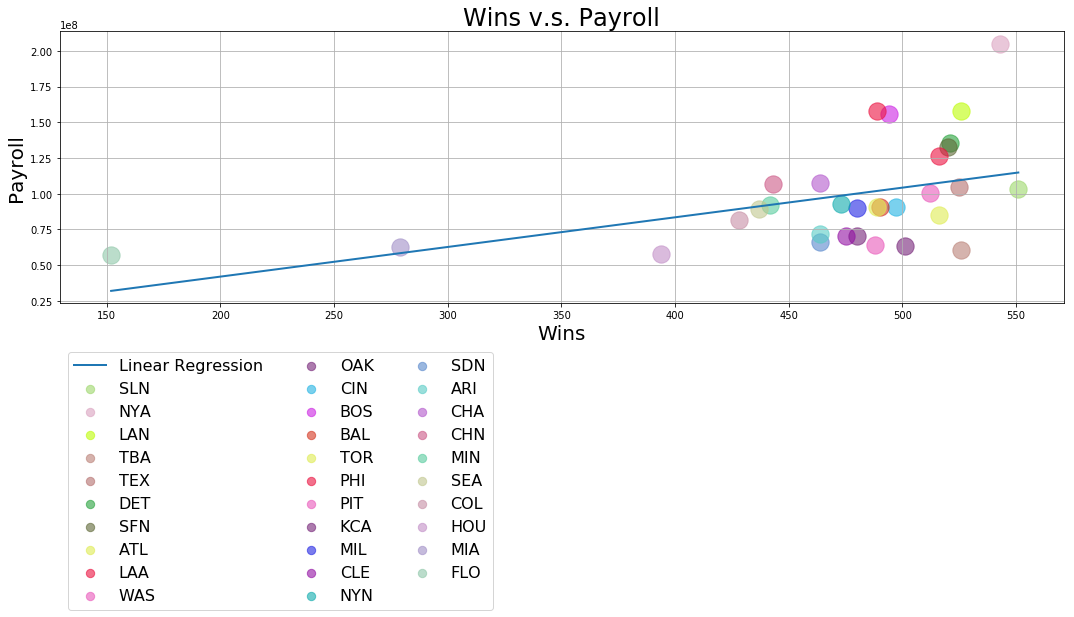

In [7]:
from matplotlib.legend_handler import HandlerPathCollection
from sklearn.linear_model import LinearRegression

plt.figure(figsize = (18, 5))

tableW = dfTeams.groupby('teamID').W.sum().to_frame() # Total wins
tableS = payrollMean # Mean salary
ws = pd.concat([tableW, tableS], axis = 1).sort_values(by = "W", ascending = False) # build WS table

# x, y, and label
xWS = ws["W"].values
yWS = ws["salary"].values
lWS = ws.index.values

colors = ['#9dd76b', '#dba2c0', '#bdfc06', '#ba8177', '#b5706e', '#26a23b', '#5e6836', 
          '#dfec52', '#eb113f', '#e958ba', '#752478', '#22B3E3', '#CC22E3', '#D43520',
          '#dfec52', '#eb113f', '#e958ba', '#752478', '#2225E3', '#9210A3', '#0EABAD',
          '#5888CC', '#58CCC6', '#B358CC', '#CC5886', '#58CC9E', '#C1C78F', '#C78FA5',
          '#C28FC7', '#A18FC7', '#8FC7A9']

# build scatter
pltGet = [0 for index in range(31)]
for index in range(31):
    pltGet[index] = plt.scatter(xWS[index], yWS[index], s = 300, color = colors[index], alpha = 0.6, label = lWS[index])

# linear Regression
reg = LinearRegression().fit(ws.W.values.reshape(-1,1), ws.salary)
pred = reg.predict(ws.W.values.reshape(-1,1))
plt.plot(ws.W, pred, linewidth = 2, label = "Linear Regression")

# figure style
plt.title("Wins v.s. Payroll", fontsize = 24)
plt.xlabel("Wins", fontsize = 20)
plt.ylabel("Payroll", fontsize = 20)
plt.grid("on")

# legend
marker_size = 70
def update(fix, ini):
    fix.update_from(ini)
    fix.set_sizes([marker_size])

plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=16, bbox_to_anchor=(0, -0.15), 
           handler_map = {type(pltGet[0]): HandlerPathCollection(update_func = update)})

# print (min(xWS), max(xWS), min(yWS), max(yWS))

plt.show()

## Task 2

### 2.1) Compute the Batting Averages  for each of the MLB teams over 2010-2015, display them in a descending sorted order. The Batting Average is defined as Hits/At Bats. The average is calculated from all players in each team. 

In [8]:
dfPlayers = dfPlayers.loc[dfPlayers["yearID"] >= 2010]
dfPlayers["Batting Average"] = dfPlayers["H"] / dfPlayers["AB"]
ba = dfPlayers.groupby(["teamID"])["Batting Average"].mean().to_frame()
ba.sort_values(by = "Batting Average", ascending = False)

,Batting Average
teamID,
CLE,0.218637
TEX,0.216171
KCA,0.209942
DET,0.209584
BOS,0.206961
CHA,0.204968
HOU,0.203618
LAA,0.201640
WAS,0.201088


### 2.2) Create a visualization of your choice which will allow you to decide whether a team’s batting average is related to its win-loss record. 
According to following scatter plot W - L v.s. Batting Average, team’s W - L has no strong relation to its batting average. Take CLE and TEX for example. Both team have high batting average compared to other teams but TEX's W - L performance is much better than that of CLE.

There is an interesting situation: 
although COL has high batting average, its W - L is the worst one. In contrast, LAN with lower batting average but its W - L performance is good.

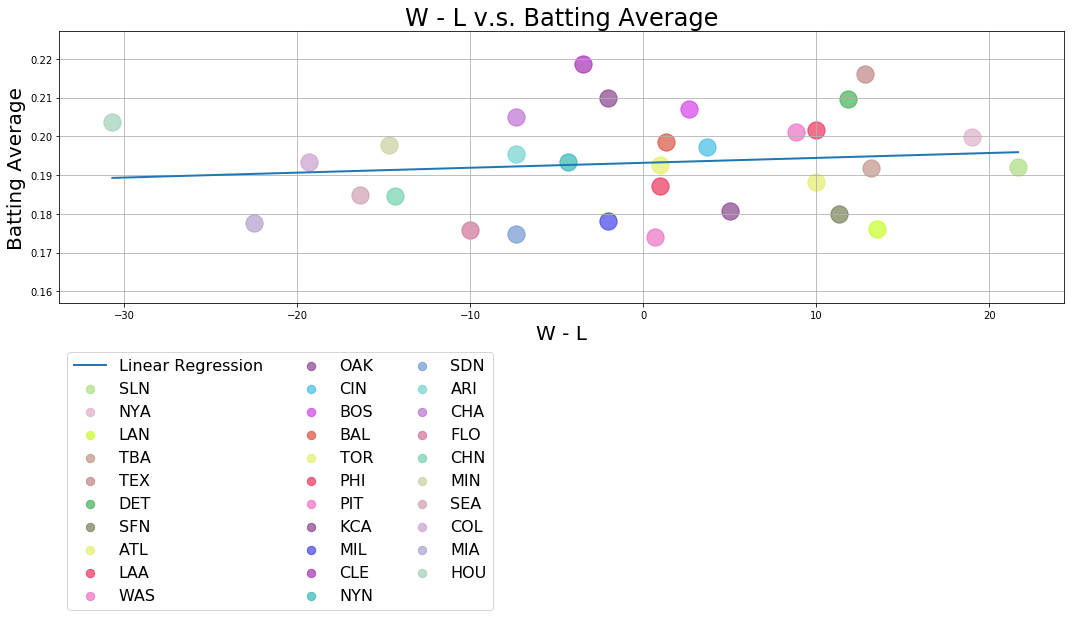

In [9]:
dfTeams["WL"] = dfTeams["W"] - dfTeams["L"] # W - L
tableWL = dfTeams.groupby('teamID').WL.mean().to_frame() # WL mean
tableBAve = ba['Batting Average'].to_frame() # Batting Average
wb = pd.concat([tableWL, tableBAve], axis = 1).sort_values(by = "WL", ascending = False) # build wb table

plt.figure(figsize = (18, 5))

xWB = wb["WL"].values
yWB = wb["Batting Average"].values
lWB = wb.index.values

colors = ['#9dd76b', '#dba2c0', '#bdfc06', '#ba8177', '#b5706e', '#26a23b', '#5e6836', 
          '#dfec52', '#eb113f', '#e958ba', '#752478', '#22B3E3', '#CC22E3', '#D43520',
          '#dfec52', '#eb113f', '#e958ba', '#752478', '#2225E3', '#9210A3', '#0EABAD',
          '#5888CC', '#58CCC6', '#B358CC', '#CC5886', '#58CC9E', '#C1C78F', '#C78FA5',
          '#C28FC7', '#A18FC7', '#8FC7A9']

# build scatter
pltGet = [0 for index in range(31)]
for index in range(31):
    pltGet[index] = plt.scatter(xWB[index], yWB[index], s = 300, color = colors[index], alpha = 0.6, label = lWB[index])

# linear Regression
reg = LinearRegression().fit(wb.WL.values.reshape(-1,1), wb["Batting Average"])
pred = reg.predict(wb.WL.values.reshape(-1,1))
plt.plot(wb.WL, pred, linewidth = 2, label = "Linear Regression")

# figure style
plt.title("W - L v.s. Batting Average", fontsize = 24)
plt.xlabel("W - L", fontsize = 20)
plt.ylabel("Batting Average", fontsize = 20)
plt.grid("on")
# plt.axis([-35, 25, 0.155, 0.23])

# legend
marker_size = 70
def update(fix, ini):
    fix.update_from(ini)
    fix.set_sizes([marker_size])

plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=16, bbox_to_anchor=(0, -0.15), 
           handler_map = {type(pltGet[0]): HandlerPathCollection(update_func = update)})

# print (min(xWB), max(xWB), min(yWB), max(yWB))

plt.show()

## Task 3

### 3.1) Display the average ERA (Earned Run Average) for each of the MLB teams in 2010-2015, in a descending sorted order. A lower ERA indicates a better pitching performance.

In [10]:
dfpitching = dfpitching.loc[(dfpitching["yearID"] >= 2010)]

pitSum = dfpitching.groupby(["teamID", "yearID"]).ERA.mean().to_frame()
pitEra = pitSum.groupby(["teamID"]).ERA.mean().to_frame()
pitEra.sort_values(by = "ERA", ascending = False)

,ERA
teamID,
TOR,5.988904
FLO,5.967441
DET,5.904207
NYA,5.614562
LAA,5.589895
HOU,5.511181
COL,5.509614
NYN,5.501658
PHI,5.346084


### 3.2) Create a visualization of your choice which will allow you to decide if a team’s win-loss record is related to its pitching performance.
According to the following W - L v.s. ERA figure, team’s W - L is not related to its ERA. That is, a team with lower ERA dose not have good W - L performance definitely. For example, SLN and NYA have good W - L performance but NYA's ERA is high and SLN's ERA is low. 

Another example: FLO and TOR. Both teams have similar W - L but TOR has much more wins.

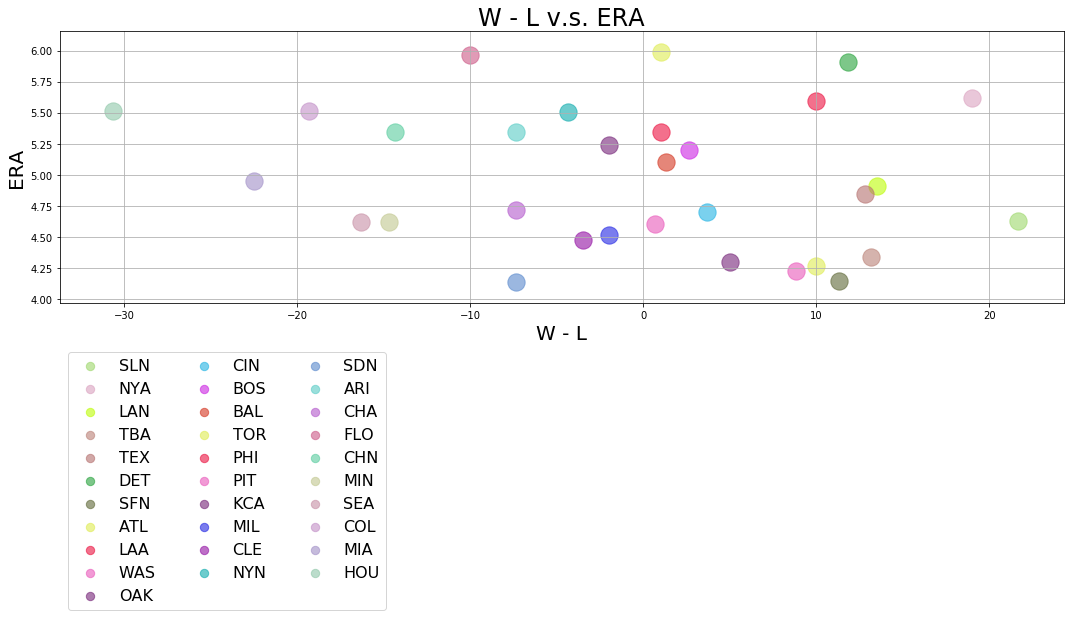

In [11]:
tableWL = dfTeams.groupby('teamID').WL.mean().to_frame() # WL mean
tableEra = pitEra['ERA'].to_frame() # ERA
we = pd.concat([tableWL, tableEra], axis = 1).sort_values(by = "WL", ascending = False) # build we table

plt.figure(figsize = (18, 5))

xWE = we["WL"].values
yWE = we["ERA"].values
lWE = we.index.values

colors = ['#9dd76b', '#dba2c0', '#bdfc06', '#ba8177', '#b5706e', '#26a23b', '#5e6836', 
          '#dfec52', '#eb113f', '#e958ba', '#752478', '#22B3E3', '#CC22E3', '#D43520',
          '#dfec52', '#eb113f', '#e958ba', '#752478', '#2225E3', '#9210A3', '#0EABAD',
          '#5888CC', '#58CCC6', '#B358CC', '#CC5886', '#58CC9E', '#C1C78F', '#C78FA5',
          '#C28FC7', '#A18FC7', '#8FC7A9']

# build scatter
pltGet = [0 for index in range(31)]
for index in range(31):
    pltGet[index] = plt.scatter(xWE[index], yWE[index], s = 300, color = colors[index], alpha = 0.6, label = lWE[index])

# linear Regression
# reg = LinearRegression().fit(we.W.values.reshape(-1,1), we["ERA"])
# pred = reg.predict(we.W.values.reshape(-1,1))
# plt.plot(we.W, pred, linewidth = 2, label = "Linear Regression")

# figure style
plt.title("W - L v.s. ERA", fontsize = 24)
plt.xlabel("W - L", fontsize = 20)
plt.ylabel("ERA", fontsize = 20)
plt.grid("on")

# legend
marker_size = 70
def update(fix, ini):
    fix.update_from(ini)
    fix.set_sizes([marker_size])

plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=16, bbox_to_anchor=(0, -0.15), 
           handler_map = {type(pltGet[0]): HandlerPathCollection(update_func = update)})

# print (min(xWE), max(xWE), min(yWE), max(yWE))

plt.show()

## Task 4

### 4.1) How are their Batting Averages changed from 2010-2015

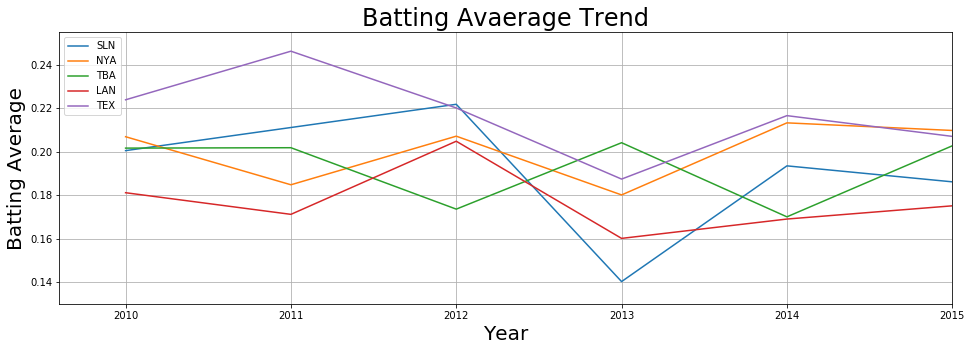

In [12]:
top5 = dfTeams.groupby("teamID").W.sum().sort_values(ascending = False).head(5).index
year = np.arange(2010, 2016)

plt.figure(figsize = (16, 5))

for index in range(len(top5)):
    top5BA = dfPlayers[dfPlayers["teamID"] == top5[index]][["yearID", "Batting Average"]].groupby("yearID").mean().values
    plt.plot(year, top5BA, label = top5[index])

plt.axis([2009.6, 2015, 0.13, 0.255])

plt.title("Batting Avaerage Trend", fontsize = 24)
plt.xlabel("Year", fontsize = 20)
plt.ylabel('Batting Average', fontsize = 20)
plt.grid('on')

plt.legend(loc = 2)
plt.show()

### 4.2) How are their Wins/Losses changed from 2010-2015

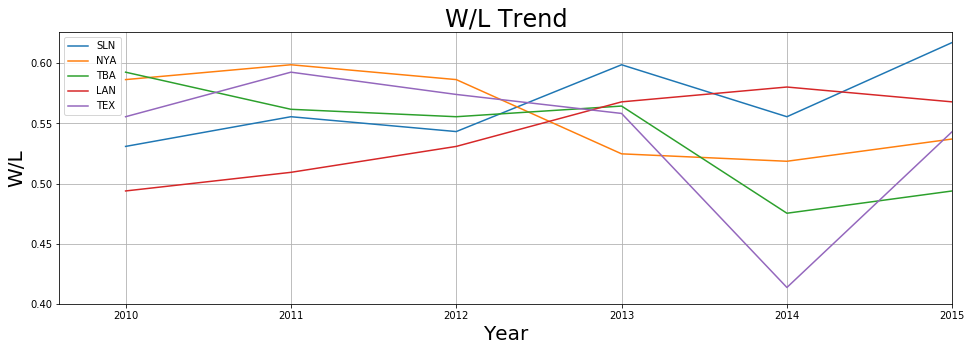

In [13]:
dfTeams["W/L"] = dfTeams["W"] / (dfTeams["L"] + dfTeams["W"]) # get W/L = W/(W + L)
top5 = dfTeams.groupby("teamID").W.sum().sort_values(ascending = False).head(5).index

year = np.arange(2010, 2016)

plt.figure(figsize = (16, 5))

for index in range(len(top5)):
    top5WL = dfTeams[dfTeams["teamID"] == top5[index]]["W/L"].values
    plt.plot(year, top5WL, label = top5[index])

plt.axis([2009.6, 2015, 0.4, 0.626])

plt.title("W/L Trend", fontsize = 24)
plt.xlabel("Year", fontsize = 20)
plt.ylabel('W/L', fontsize = 20)
plt.grid('on')

plt.legend(loc = 2)
plt.show()

### 4.3) How are their average ERAs changed from 2010-2015 

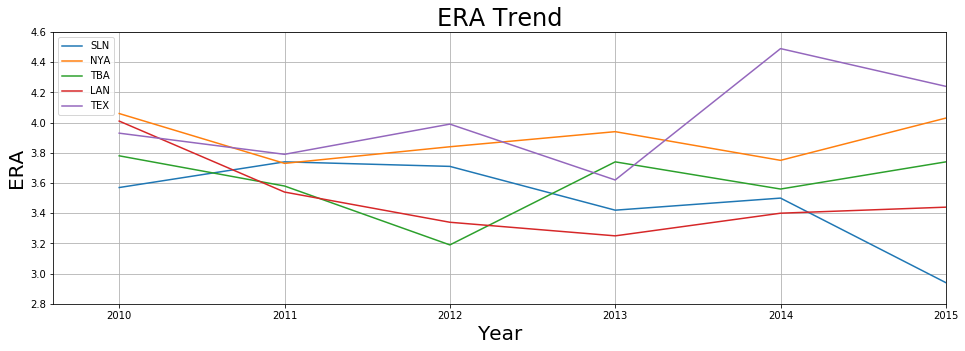

In [14]:
plt.figure(figsize = (16, 5))

for index in range(len(top5)):
    top5ERA = dfTeams[dfTeams["teamID"] == top5[index]]["ERA"].values
    plt.plot(year, top5ERA, label = top5[index])

plt.axis([2009.6, 2015, 2.8, 4.6])

plt.title("ERA Trend", fontsize = 24)
plt.xlabel("Year", fontsize = 20)
plt.ylabel('ERA', fontsize = 20)
plt.grid('on')

plt.legend(loc = 2)
plt.show()

### 4.4) How are their annual payrolls changed from 2010-2015

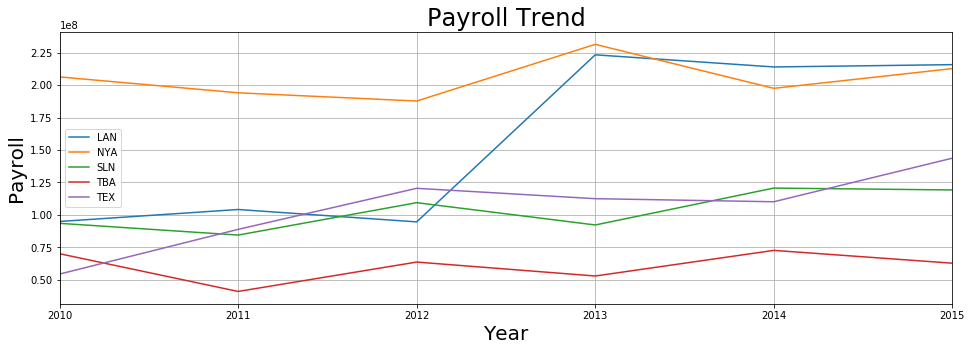

In [15]:
top5Teams = dfTeams.groupby("teamID", as_index = False).W.sum().sort_values(by = "W", ascending = False).head(5)
top5Pay = dfPlayers[dfPlayers["teamID"].isin(top5Teams["teamID"])].groupby(["yearID", "teamID"], as_index = False)["salary"].sum()
top5Pay = top5Pay.groupby("teamID")

fig, axis = plt.subplots(1, 1)

for lb, index in top5Pay:
    axis = index.plot(ax = axis, kind = "line", x = "yearID", y = "salary", label = lb, figsize = (16, 5))

plt.title("Payroll Trend", fontsize = 24)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Payroll", fontsize = 20)
plt.grid('on')

plt.legend()
plt.show()

### Analysis
From trend charts in task 4 above, we can notice that LAN has a good investment from 2012 because with its payroll increasing, its W/L is improved although its batting average drops between 2012 to 2013. In contrast, NYA maintains high payroll but its W/L drops since 2012.

Moreover, there is an interesting situation:
For LAN between 2012 to 2013, with conspicuous increase in payroll, its performance in W/L and ERA are improved but its batting average drops dramatically. For SLN between 2012 to 2013, its batting average drops at most among 5 teams but its W/L increases at most. 

In summary, according to this, it supports that batting average may not be related to W/L but payroll may be related to W/L. 